In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
df = pd.read_excel('./data/rolling_sales/rs.xlsx')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A1,655000,44866
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,215000,45034
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,570000,45161
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1,A1,0,45030
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1,B9,350000,45103


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         73305 non-null  int64  
 1   NEIGHBORHOOD                    73305 non-null  object 
 2   BUILDING CLASS CATEGORY         73305 non-null  object 
 3   TAX CLASS AT PRESENT            73240 non-null  object 
 4   BLOCK                           73305 non-null  int64  
 5   LOT                             73305 non-null  int64  
 6   EASEMENT                        0 non-null      float64
 7   BUILDING CLASS AT PRESENT       73240 non-null  object 
 8   ADDRESS                         73305 non-null  object 
 9   APARTMENT NUMBER                17697 non-null  object 
 10  ZIP CODE                        73300 non-null  float64
 11  RESIDENTIAL UNITS               55472 non-null  float64
 12  COMMERCIAL UNITS                

In [5]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A1,655000,44866
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,215000,45034
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,570000,45161
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1,A1,0,45030
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1,B9,350000,45103


In [7]:
df['NEIGHBORHOOD'].value_counts().count()

253

In [8]:
df['BOROUGH'].value_counts().count()

5

In [9]:
def convert_to_date(number):
    start_date = datetime(1900, 1, 1)
    return start_date + timedelta(days=number)

df['SALE DATE'] = df['SALE DATE'].apply(convert_to_date)
borough_mapping = {'1': 'Manhattan', '2': 'Bronx', '3': 'Brooklyn', '4': 'Queens', '5': 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].astype(str).replace(borough_mapping)
df['SALE PRICE'] = df['SALE PRICE'].replace({' -  ': '0'}).astype(float)
df['sale_month'] = df['SALE DATE'].dt.month_name()
df['sale_year'] = df['SALE DATE'].dt.year

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         73305 non-null  object        
 1   NEIGHBORHOOD                    73305 non-null  object        
 2   BUILDING CLASS CATEGORY         73305 non-null  object        
 3   TAX CLASS AT PRESENT            73240 non-null  object        
 4   BLOCK                           73305 non-null  int64         
 5   LOT                             73305 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       73240 non-null  object        
 8   ADDRESS                         73305 non-null  object        
 9   APARTMENT NUMBER                17697 non-null  object        
 10  ZIP CODE                        73300 non-null  float64       
 11  RE

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_month,sale_year
0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,1842.0,2048.0,1901.0,1,A1,655000.0,2022-11-03,November,2022
1,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,1646.0,1497.0,1899.0,1,A1,215000.0,2023-04-20,April,2023
2,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,1646.0,1497.0,1899.0,1,A1,570000.0,2023-08-25,August,2023
3,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,1782.0,1548.0,1899.0,1,A1,0.0,2023-04-16,April,2023
4,Bronx,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,1658.0,1428.0,1901.0,1,B9,350000.0,2023-06-28,June,2023


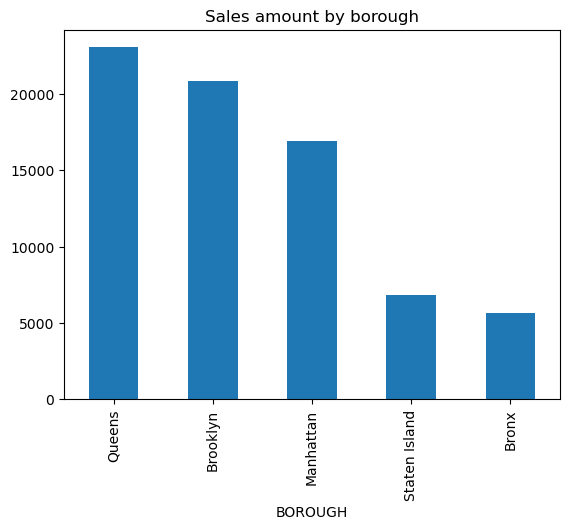

In [12]:
df['BOROUGH'].value_counts().plot.bar()
plt.title("Sales amount by borough");

In [17]:
df[(df['BOROUGH'] =='Queens') & (df['SALE PRICE'] != 0)].count()[0]

14985

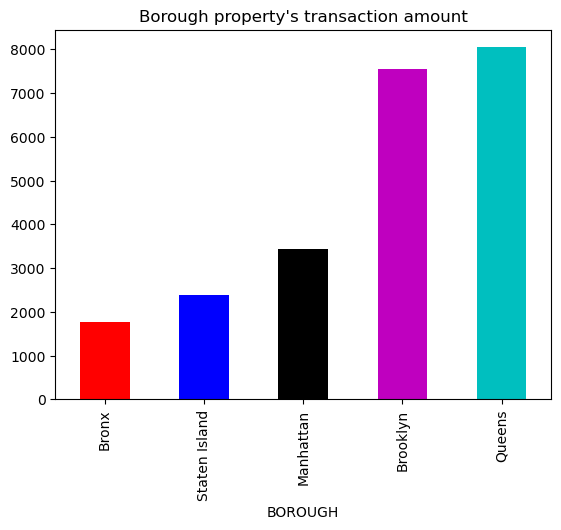

In [16]:
df[df['SALE PRICE'] == 0]['BOROUGH'].value_counts().sort_values().plot.bar(color=['r', 'b', 'k', 'm', 'c'])
plt.title("Borough property's transaction amount");

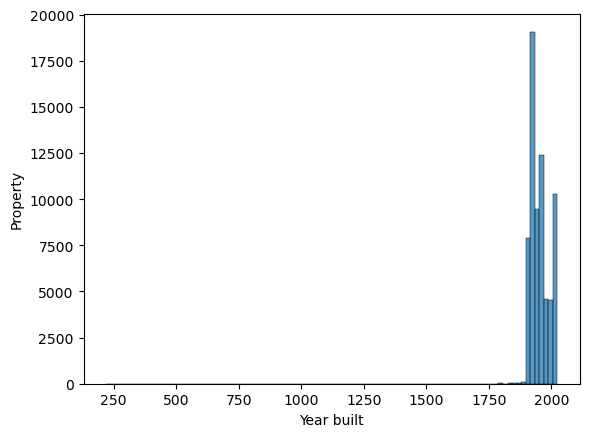

In [18]:
sns.histplot(df[df['YEAR BUILT']!=0]['YEAR BUILT'],bins=100);
plt.ylabel("Property")
plt.xlabel("Year built");

In [19]:
df[df['YEAR BUILT']!=0]['YEAR BUILT'].value_counts()

YEAR BUILT
1920.0    5189
1930.0    4359
1925.0    3722
1910.0    2807
1950.0    2759
          ... 
1879.0       1
1864.0       1
1841.0       1
1869.0       1
1878.0       1
Name: count, Length: 179, dtype: int64

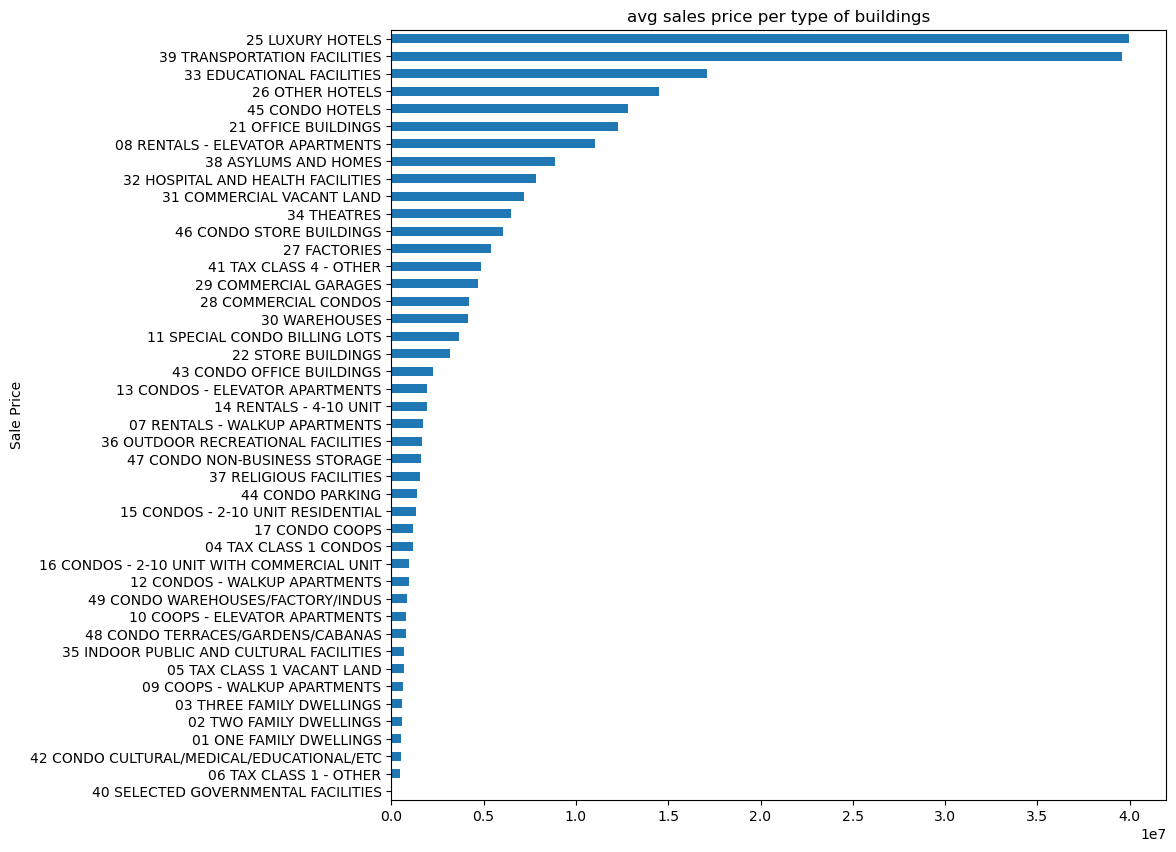

In [21]:
plt.figure(figsize=(10,10))

df['SALE PRICE'].groupby(df['BUILDING CLASS CATEGORY']).mean().sort_values().plot.barh()
plt.ylabel("Sale Price")

plt.title('avg sales price per type of buildings');

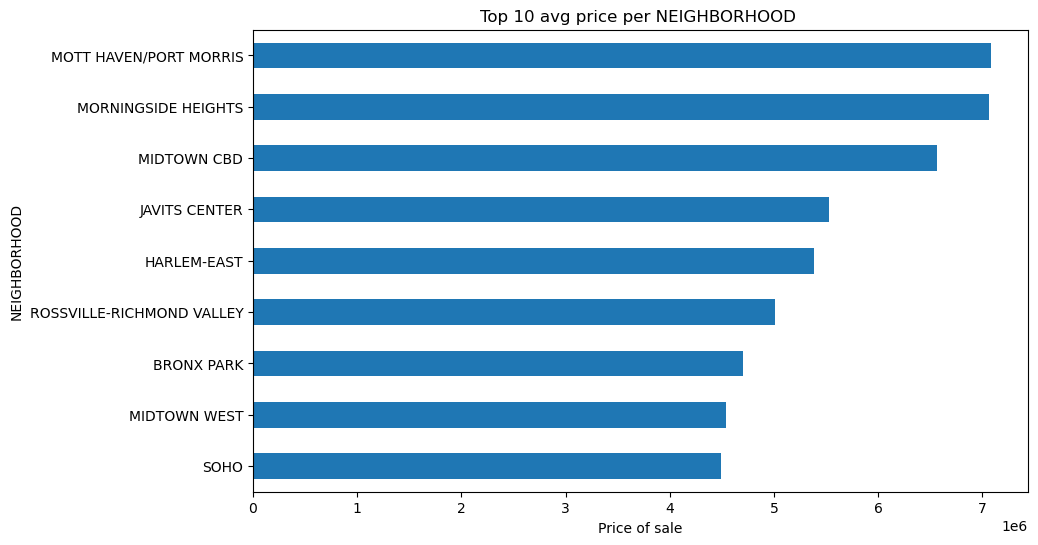

In [22]:
plt.figure(figsize=(10,6))
df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().sort_values()[244:].plot.barh()
plt.title('Top 10 avg price per NEIGHBORHOOD ')
plt.xlabel("Price of sale");

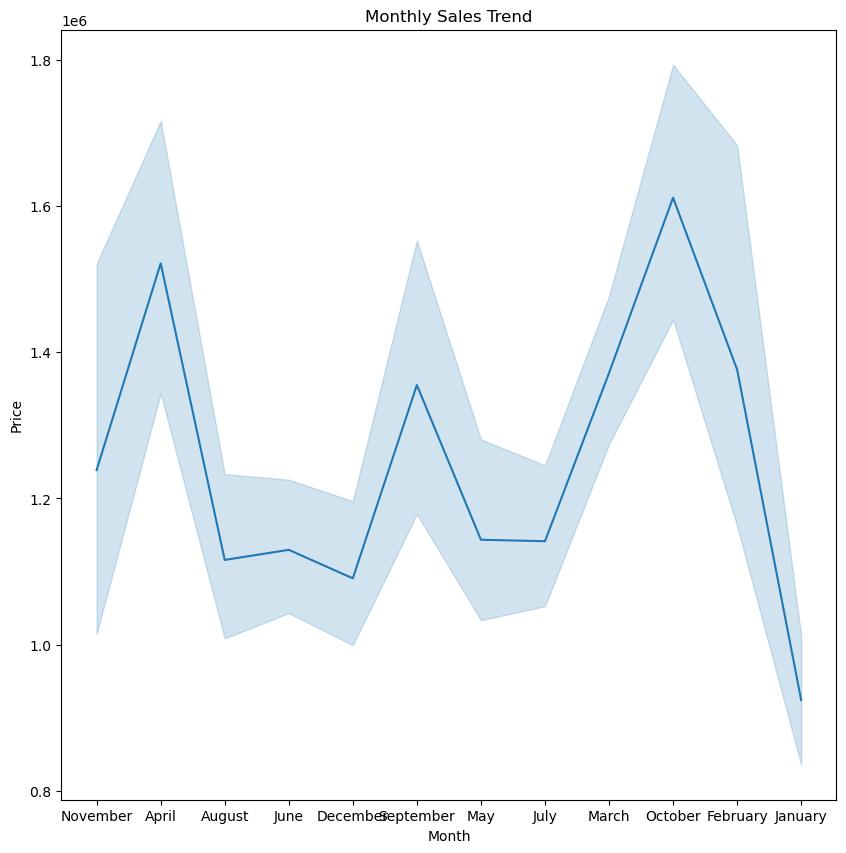

In [25]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='sale_month',y='SALE PRICE',data=df)
plt.title('Monthly Sales Trend')
plt.ylabel('Price')
plt.xlabel('Month')
plt.show()

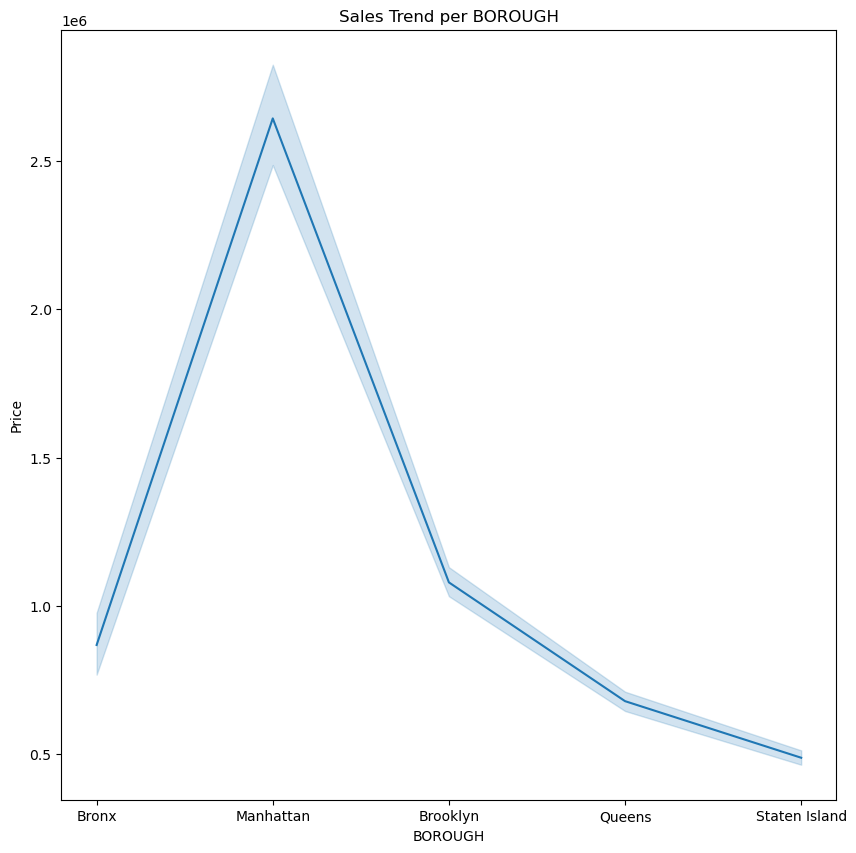

In [29]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='BOROUGH',y='SALE PRICE',data=df)
plt.title('Sales Trend per BOROUGH')
plt.ylabel('Price')
plt.show();

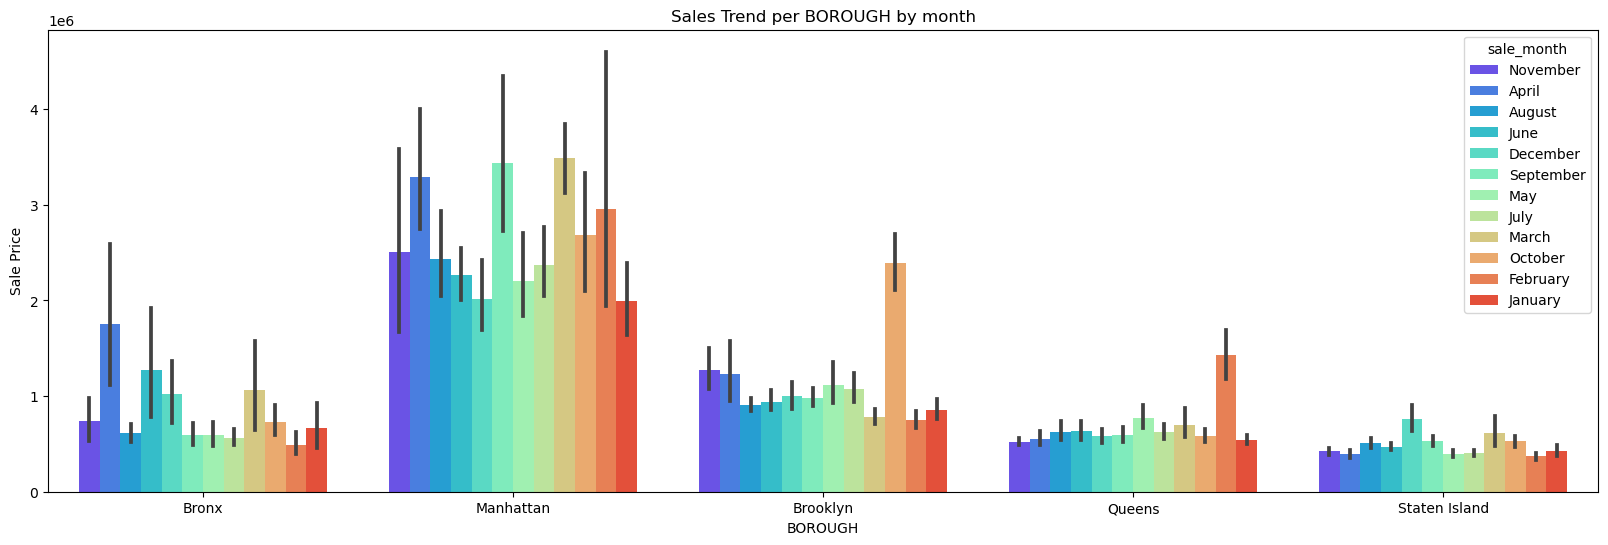

In [30]:
plt.figure(figsize=(20,6))
sns.barplot(x='BOROUGH', y='SALE PRICE', hue='sale_month', data=df, palette='rainbow');
plt.title('Sales Trend per BOROUGH by month')
plt.ylabel('Sale Price')
plt.show()

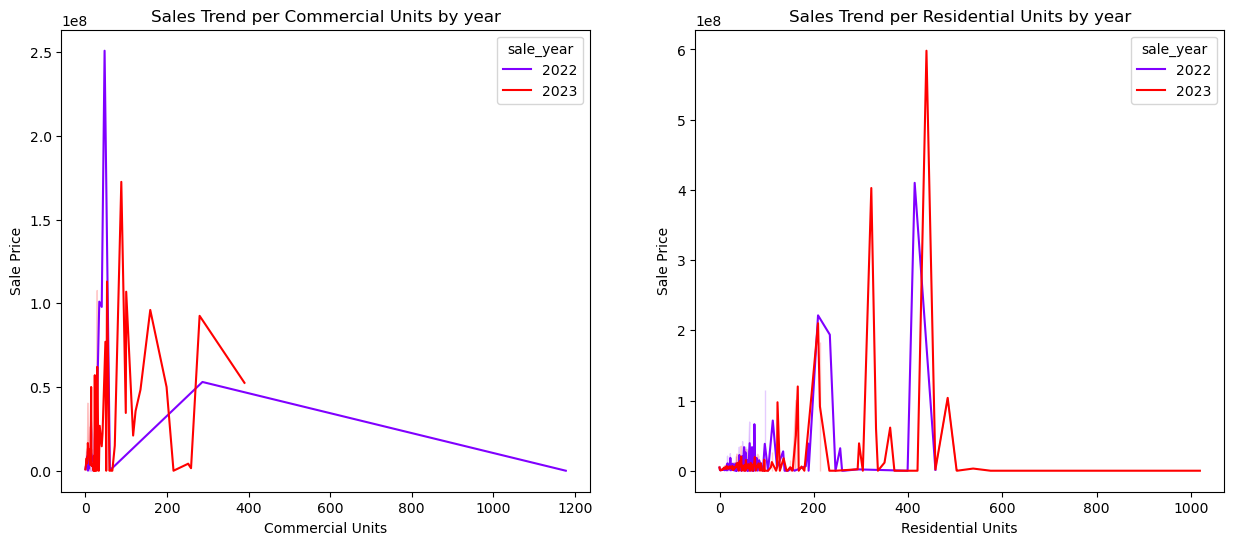

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Sales Trend per Commercial Units by year')
sns.lineplot(x="COMMERCIAL UNITS",y="SALE PRICE",hue='sale_year',data=df, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Commercial Units')
plt.subplot(1, 2, 2)
plt.title('Sales Trend per Residential Units by year')
sns.lineplot(x="RESIDENTIAL UNITS",y="SALE PRICE",hue='sale_year',data=df, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Residential Units');

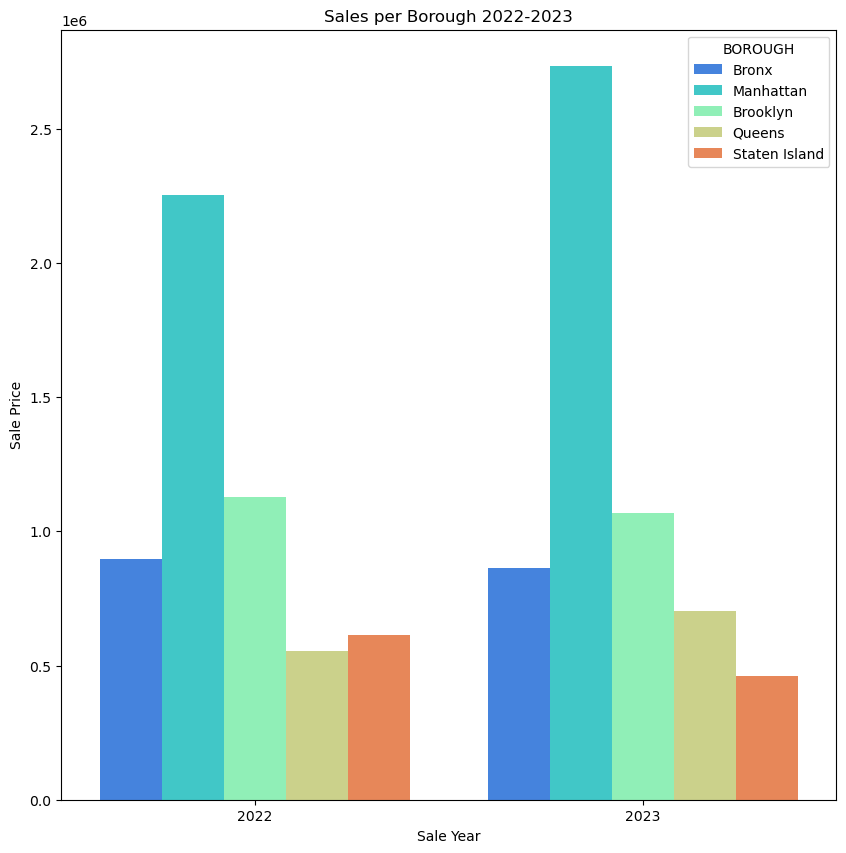

In [33]:
plt.subplots(figsize=(10, 10))
sns.barplot(x='sale_year', y='SALE PRICE', hue='BOROUGH', data=df, palette='rainbow', errorbar=None)
plt.title('Sales per Borough 2022-2023')
plt.ylabel('Sale Price')
plt.xlabel('Sale Year');